# String art Hough transform

## Image pre processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def show_img(img):
    #BGR to RGB
    img2show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #axis off
    plt.axis("off")

    #show image
    plt.imshow(img2show)

def plot_bw(img):
    #change background color to black
    plt.figure(facecolor='black')
    
    plt.axis("off")
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    

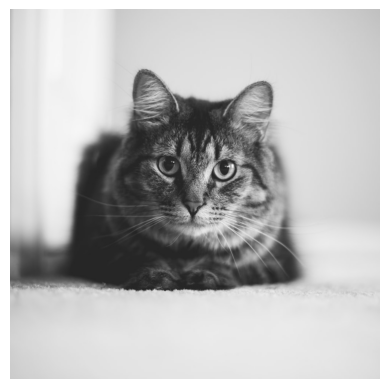

In [23]:
IMG = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
show_img(IMG)
plt.show()

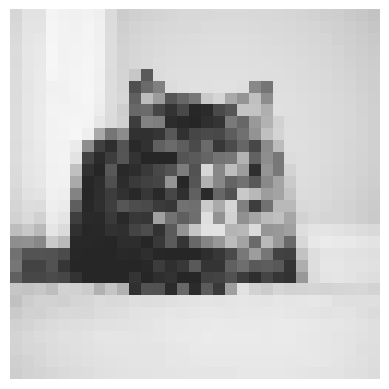

In [84]:
# Reshaping the image
shape = np.array([31, 31])

IMG_RESHAPED = cv2.resize(IMG, shape)

show_img(IMG_RESHAPED)
plt.show()

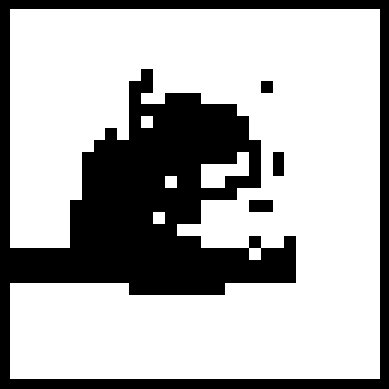

In [85]:
#Converting to binary black and white
IMG_BW = cv2.threshold(IMG_RESHAPED, 127, 255, cv2.THRESH_BINARY)[1]
plot_bw(IMG_BW)
plt.show()

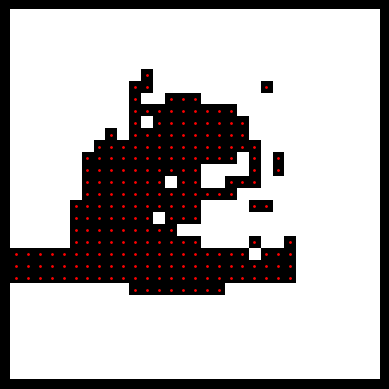

In [86]:
BLACK_PIXELS = np.where(IMG_BW == 0)
BLACK_PIXELS = np.array(BLACK_PIXELS).T

plot_bw(IMG_BW)
plt.scatter(BLACK_PIXELS[:, 1], BLACK_PIXELS[:, 0], s=1, c='r')
plt.show()

## Hough setup

In [87]:
CENTER = shape/2 - 0.5
RADIUS = shape[0]/2
N_POINTS = 12
DELTA = 2*np.pi/N_POINTS

In [88]:
POINTS = np.array([
    [CENTER[0] + np.cos(DELTA * i) * RADIUS, CENTER[1] + np.sin(DELTA * i) * RADIUS] for i in range(N_POINTS)
])

In [91]:
def drawPoints(points):
    for point in points:
        plt.plot(point[0], point[1], 'ro')

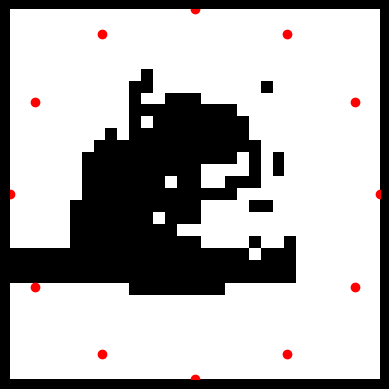

In [92]:
plot_bw(IMG_BW)
drawPoints(POINTS)
plt.show()

In [96]:
def plotAccumulator(accumulator, title='Hough Accumulator'):
    plt.figure(figsize=(10, 10))
    plt.imshow(accumulator, cmap='jet')
    plt.title(title)
    plt.xlabel('First Pin')
    plt.ylabel('Second Pin')
    plt.show()

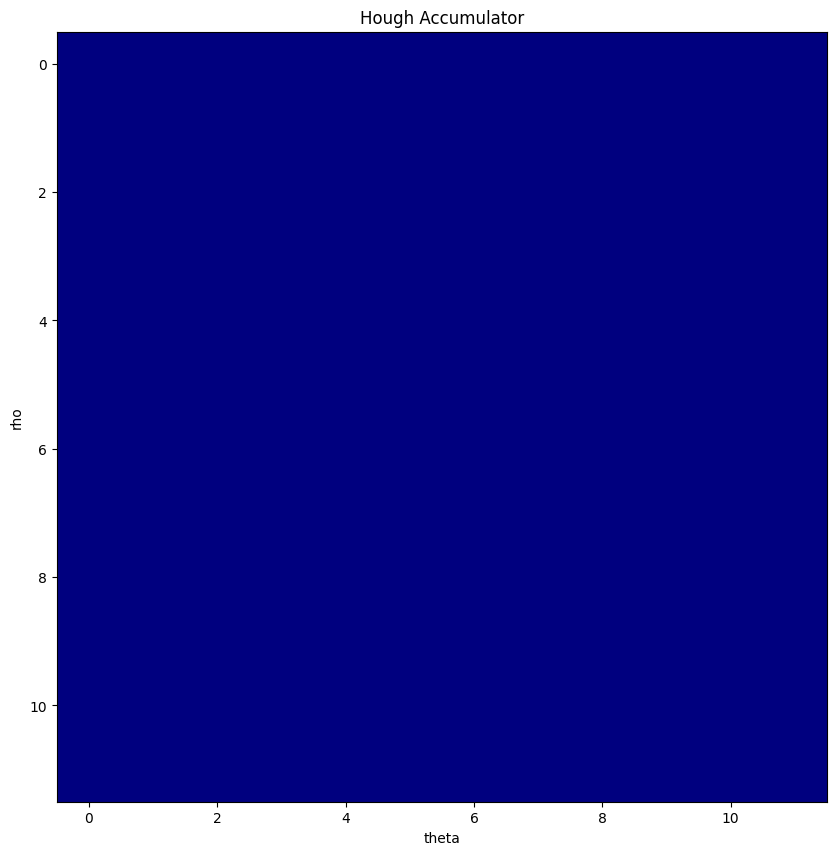

In [97]:
accumulator = np.zeros((N_POINTS, N_POINTS))
plotAccumulator(accumulator)